## Import libraries and load data

In [82]:
# Libraries to work with the data object
import pandas as pd 
import numpy as np

# libraries to visualize
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image

import graphviz
import pydotplus
import xgboost as xgb

# sklearn packages for Decision Tree
from sklearn import metrics
from collections import Counter
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc 
from sklearn.metrics import roc_auc_score

# sklearn packages for KNN
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

# sklearn packages for Hyperparameter tuning
from sklearn.svm import LinearSVC
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

# sklearn packages for RandomForest and Logistic Regression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import VotingClassifier
from xgboost import XGBClassifier

# CodeCarbon library
from codecarbon import EmissionsTracker

# Sampling libraries
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.under_sampling import TomekLinks
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTETomek
from imblearn.pipeline import Pipeline

#load our data
original_df = pd.read_csv("../data/heart_disease_health_indicators_BRFSS2015.csv", delimiter=",")

[codecarbon INFO @ 14:31:42] Energy consumed for RAM : 0.006006 kWh. RAM Power : 11.703141689300537 W
[codecarbon INFO @ 14:31:42] Energy consumed for all CPUs : 0.011576 kWh. Total CPU Power : 22.5 W
[codecarbon INFO @ 14:31:42] 0.017583 kWh of electricity used since the beginning.
[codecarbon INFO @ 14:31:57] Energy consumed for RAM : 0.006055 kWh. RAM Power : 11.703141689300537 W
[codecarbon INFO @ 14:31:57] Energy consumed for all CPUs : 0.011670 kWh. Total CPU Power : 22.5 W
[codecarbon INFO @ 14:31:57] 0.017725 kWh of electricity used since the beginning.
[codecarbon INFO @ 14:32:12] Energy consumed for RAM : 0.006104 kWh. RAM Power : 11.703141689300537 W
[codecarbon INFO @ 14:32:12] Energy consumed for all CPUs : 0.011764 kWh. Total CPU Power : 22.5 W
[codecarbon INFO @ 14:32:12] 0.017867 kWh of electricity used since the beginning.
[codecarbon INFO @ 14:32:27] Energy consumed for RAM : 0.006152 kWh. RAM Power : 11.703141689300537 W
[codecarbon INFO @ 14:32:27] Energy consumed f

In [24]:
# Below, we make a list of features/independent variables 'X', and specify our target/dependent variable, y
# The model will guess/predict the 'y' feature (our target) based on the list of features, 'X'
# Running the cell will not produce any output. This is because we are defining X and y, which we will be using in the next section to train our model

X = original_df[['GenHlth', 'Age', 'DiffWalk', 'HighBP', 'Stroke', 'PhysHlth', 'HighChol', 'Diabetes', 'Income', 'Education', 'Smoker']].values

y = original_df['HeartDiseaseorAttack'].values

In [25]:
# split data into test and train - 80/20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Extra functions

In [ ]:
def evaluate_model(model, X_train, y_train):
    # Fit the model
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)

    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    auc_roc = roc_auc_score(y_test, y_pred)

    # Return the results
    return {
        'Model': model.__class__.__name__,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1,
        'AUC': auc_roc
    }

[codecarbon INFO @ 16:47:05] Energy consumed for RAM : 0.032384 kWh. RAM Power : 11.703141689300537 W
[codecarbon INFO @ 16:47:05] Energy consumed for all CPUs : 0.062343 kWh. Total CPU Power : 22.5 W
[codecarbon INFO @ 16:47:05] 0.094728 kWh of electricity used since the beginning.


In [27]:
def draw_confusion_matrix(y_true, y_pred):
    # Create a confusion matrix
    cf_matrix = confusion_matrix(y_true, y_pred)

    # Create labels for the matrix
    group_names = ['True Negative','False Positive','False Negative','True Positive']
    group_counts = ["{0:0.0f}".format(value) for value in cf_matrix.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]
    labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)

    # Create a heatmap from the confusion matrix
    sns.heatmap(cf_matrix, annot=labels, fmt="", cmap='Blues')

## Sample the imbalanced dataframe

### Oversampling

#### SMOTE

In [28]:
print("Count before:", Counter(y_train))
smoOverSam = SMOTE()
X_S, y_S = smoOverSam.fit_resample(X_train, y_train)
print("Count after:", Counter(y_S))

Count before: Counter({0.0: 183819, 1.0: 19125})
Count after: Counter({0.0: 183819, 1.0: 183819})


#### Random

In [29]:
print("Count before:", Counter(y_train))
ranOveSam = RandomOverSampler(sampling_strategy='minority')
X_ro, y_ro = ranOveSam.fit_resample(X_train, y_train)
print("Count after:", Counter(y_ro))

Count before: Counter({0.0: 183819, 1.0: 19125})
Count after: Counter({0.0: 183819, 1.0: 183819})


### Undersampling

#### Random

In [30]:
print("Count before:", Counter(y_train))
ranUndSam = RandomUnderSampler(sampling_strategy='majority')
X_ru, y_ru = ranUndSam.fit_resample(X_train, y_train)
print("Count after:", Counter(y_ru))

Count before: Counter({0.0: 183819, 1.0: 19125})
Count after: Counter({0.0: 19125, 1.0: 19125})


#### TomekLinks

In [31]:
print("Count before:", Counter(y_train))
tomLinUndSam = TomekLinks(sampling_strategy='auto')
X_T, y_T = tomLinUndSam.fit_resample(X_train, y_train)
print("Count after:", Counter(y_T))

Count before: Counter({0.0: 183819, 1.0: 19125})


[codecarbon INFO @ 14:13:50] Energy consumed for RAM : 0.002532 kWh. RAM Power : 11.703141689300537 W
[codecarbon INFO @ 14:13:50] Energy consumed for all CPUs : 0.004881 kWh. Total CPU Power : 22.5 W
[codecarbon INFO @ 14:13:50] 0.007412 kWh of electricity used since the beginning.


Count after: Counter({0.0: 182258, 1.0: 19125})


### Combining oversampling and undersampling - SMOTE and TomekLinks

In [32]:
print("Count before:", Counter(y_train))
resample = SMOTETomek(tomek=TomekLinks(sampling_strategy='majority'))
reresample = SMOTE
X_ST, y_ST = resample.fit_resample(X_train, y_train)
print("Count after:", Counter(y_ST))

Count before: Counter({0.0: 183819, 1.0: 19125})


[codecarbon INFO @ 14:14:05] Energy consumed for RAM : 0.002581 kWh. RAM Power : 11.703141689300537 W
[codecarbon INFO @ 14:14:05] Energy consumed for all CPUs : 0.004974 kWh. Total CPU Power : 22.5 W
[codecarbon INFO @ 14:14:05] 0.007555 kWh of electricity used since the beginning.
[codecarbon INFO @ 14:14:20] Energy consumed for RAM : 0.002629 kWh. RAM Power : 11.703141689300537 W
[codecarbon INFO @ 14:14:20] Energy consumed for all CPUs : 0.005068 kWh. Total CPU Power : 22.5 W
[codecarbon INFO @ 14:14:20] 0.007698 kWh of electricity used since the beginning.
[codecarbon INFO @ 14:14:35] Energy consumed for RAM : 0.002678 kWh. RAM Power : 11.703141689300537 W
[codecarbon INFO @ 14:14:35] Energy consumed for all CPUs : 0.005162 kWh. Total CPU Power : 22.5 W
[codecarbon INFO @ 14:14:35] 0.007840 kWh of electricity used since the beginning.
[codecarbon INFO @ 14:14:50] Energy consumed for RAM : 0.002727 kWh. RAM Power : 11.703141689300537 W
[codecarbon INFO @ 14:14:50] Energy consumed f

Count after: Counter({1.0: 183819, 0.0: 183785})


## Training models

### Decision tree

#### Oversampled

In [33]:
clf = DecisionTreeClassifier(criterion="entropy", max_depth=6).fit(X_S, y_S)
y_S_pred = clf.predict(X_test)

Model: DecisionTreeClassifier
Accuracy: 0.7706559444970041
Precision: 0.23870035002282758
Recall: 0.6579278523489933
F1 Score: 0.3503070910106086
AUC-ROC: 0.7201382213363483


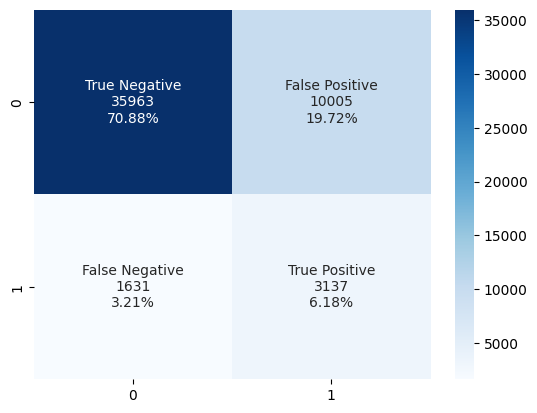

In [34]:
y_S_pred = clf.predict(X_test)
evaluate_model(clf, X_S, y_S)
draw_confusion_matrix(y_test, y_S_pred)

##### Random - <span style="color:red">**(BEST)**</span>

{'Model': 'DecisionTreeClassifier', 'Accuracy': 0.714660201829076, 'Precision': 0.2194741404218434, 'Recall': 0.7965604026845637, 'F1 Score': 0.3441308385810719, 'AUC-ROC': 0.7513627805278023}


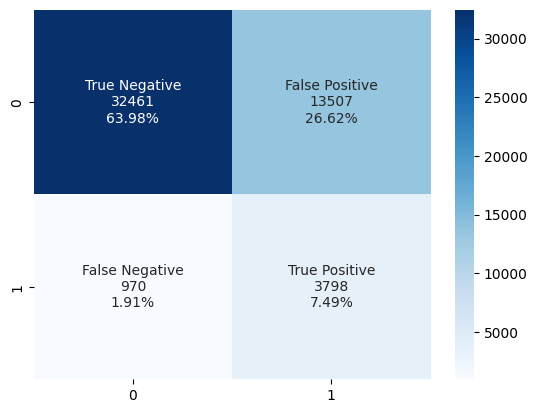

[codecarbon INFO @ 16:16:34] Energy consumed for RAM : 0.026439 kWh. RAM Power : 11.703141689300537 W
[codecarbon INFO @ 16:16:34] Energy consumed for all CPUs : 0.050898 kWh. Total CPU Power : 22.5 W
[codecarbon INFO @ 16:16:34] 0.077337 kWh of electricity used since the beginning.
[codecarbon INFO @ 16:16:49] Energy consumed for RAM : 0.026488 kWh. RAM Power : 11.703141689300537 W
[codecarbon INFO @ 16:16:49] Energy consumed for all CPUs : 0.050992 kWh. Total CPU Power : 22.5 W
[codecarbon INFO @ 16:16:49] 0.077479 kWh of electricity used since the beginning.
[codecarbon INFO @ 16:17:04] Energy consumed for RAM : 0.026536 kWh. RAM Power : 11.703141689300537 W
[codecarbon INFO @ 16:17:04] Energy consumed for all CPUs : 0.051085 kWh. Total CPU Power : 22.5 W
[codecarbon INFO @ 16:17:04] 0.077622 kWh of electricity used since the beginning.


In [ ]:
clf.fit(X_ro, y_ro)
y_ro_pred = clf.predict(X_test)
o1 = evaluate_model(clf, X_ro, y_ro)
print(o1)
draw_confusion_matrix(y_test, y_ro_pred)

#### Undersampled

##### Random

{'Model': 'DecisionTreeClassifier', 'Accuracy': 0.7128074739829706, 'Precision': 0.21841787786522662, 'Recall': 0.7973993288590604, 'F1 Score': 0.3429086809470124, 'AUC-ROC': 0.7507162846871007}


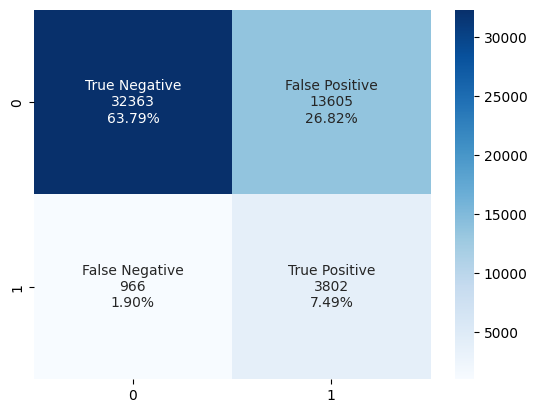

[codecarbon INFO @ 16:17:49] Energy consumed for RAM : 0.026683 kWh. RAM Power : 11.703141689300537 W
[codecarbon INFO @ 16:17:49] Energy consumed for all CPUs : 0.051367 kWh. Total CPU Power : 22.5 W
[codecarbon INFO @ 16:17:49] 0.078049 kWh of electricity used since the beginning.


In [134]:
clf.fit(X_ru, y_ru)
y_ru_pred = clf.predict(X_test)
o2 = evaluate_model(clf, X_ru, y_ru)
print(o2)
draw_confusion_matrix(y_test, y_ru_pred)

##### TomekLinks

Model: DecisionTreeClassifier
Accuracy: 0.9077578051087984
Precision: 0.5785714285714286
Recall: 0.06795302013422819
F1 Score: 0.12162162162162163
AUC-ROC: 0.5314095069345002


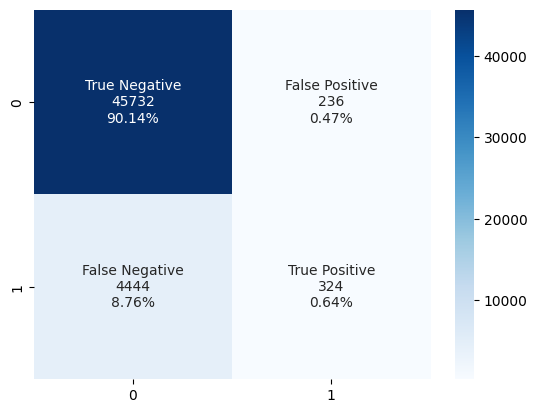

In [37]:
clf.fit(X_T, y_T)
y_tl_pred = clf.predict(X_test)
evaluate_model(clf, X_T, y_T)
draw_confusion_matrix(y_test, y_tl_pred)

##### Undersampled and Oversampled - TomekLinks and SMOTE

{'Model': 'DecisionTreeClassifier', 'Accuracy': 0.7554202144433932, 'Precision': 0.2337816180057139, 'Recall': 0.7036493288590604, 'F1 Score': 0.35095977823107904, 'AUC-ROC': 0.7322197218607867}


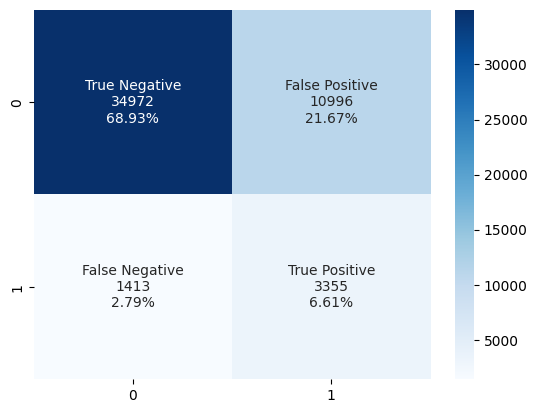

In [135]:
clf.fit(X_ST, y_ST)
y_st_pred = clf.predict(X_test)
o3 = evaluate_model(clf, X_ST, y_ST)
print(o3)
draw_confusion_matrix(y_test, y_st_pred)

### K-NN

In [39]:
clf2 = KNeighborsClassifier()
scaler = StandardScaler()

#### Oversampled

##### SMOTE

[codecarbon INFO @ 16:18:04] Energy consumed for RAM : 0.026731 kWh. RAM Power : 11.703141689300537 W
[codecarbon INFO @ 16:18:04] Energy consumed for all CPUs : 0.051461 kWh. Total CPU Power : 22.5 W
[codecarbon INFO @ 16:18:04] 0.078192 kWh of electricity used since the beginning.
[codecarbon INFO @ 16:18:19] Energy consumed for RAM : 0.026780 kWh. RAM Power : 11.703141689300537 W
[codecarbon INFO @ 16:18:19] Energy consumed for all CPUs : 0.051554 kWh. Total CPU Power : 22.5 W
[codecarbon INFO @ 16:18:19] 0.078334 kWh of electricity used since the beginning.
[codecarbon INFO @ 16:18:34] Energy consumed for RAM : 0.026829 kWh. RAM Power : 11.703141689300537 W
[codecarbon INFO @ 16:18:34] Energy consumed for all CPUs : 0.051648 kWh. Total CPU Power : 22.5 W
[codecarbon INFO @ 16:18:34] 0.078477 kWh of electricity used since the beginning.


{'Model': 'KNeighborsClassifier', 'Accuracy': 0.8170529801324503, 'Precision': 0.2384704519119351, 'Recall': 0.4316275167785235, 'F1 Score': 0.3072100313479624, 'AUC-ROC': 0.6443292474251128}


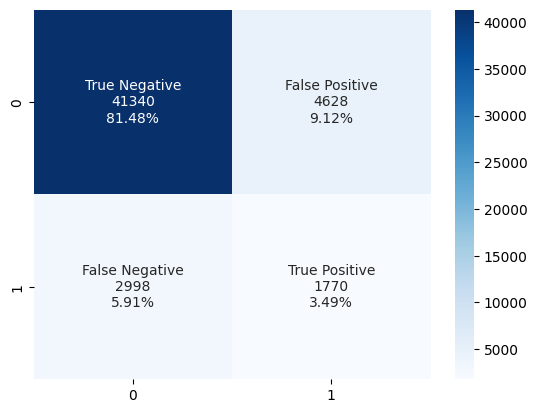

In [136]:
scaler.fit(X_S)
X_train_std = scaler.transform(X_S)

clf2.fit(X_train_std, y_S)

X_test_std = scaler.transform(X_test)

y_S_pred_2 = clf2.predict(X_test_std)

o4 = evaluate_model(clf2, X_S, y_S)
print(o4)
draw_confusion_matrix(y_test, y_S_pred_2)


##### Random

[codecarbon INFO @ 14:15:50] Energy consumed for RAM : 0.002921 kWh. RAM Power : 11.703141689300537 W
[codecarbon INFO @ 14:15:50] Energy consumed for all CPUs : 0.005631 kWh. Total CPU Power : 22.5 W
[codecarbon INFO @ 14:15:50] 0.008552 kWh of electricity used since the beginning.
[codecarbon INFO @ 14:16:05] Energy consumed for RAM : 0.002970 kWh. RAM Power : 11.703141689300537 W
[codecarbon INFO @ 14:16:05] Energy consumed for all CPUs : 0.005725 kWh. Total CPU Power : 22.5 W
[codecarbon INFO @ 14:16:05] 0.008695 kWh of electricity used since the beginning.
[codecarbon INFO @ 14:16:20] Energy consumed for RAM : 0.003019 kWh. RAM Power : 11.703141689300537 W
[codecarbon INFO @ 14:16:20] Energy consumed for all CPUs : 0.005819 kWh. Total CPU Power : 22.5 W
[codecarbon INFO @ 14:16:20] 0.008837 kWh of electricity used since the beginning.


Model: KNeighborsClassifier
Accuracy: 0.8564924314096499
Precision: 0.27693946387360197
Recall: 0.3271812080536913
F1 Score: 0.2999711566195558
AUC-ROC: 0.6192880457254186


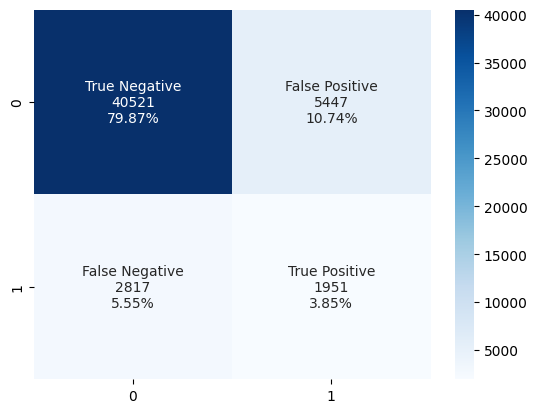

In [41]:
scaler.fit(X_ro)
X_train_std2 = scaler.transform(X_ro)

clf2.fit(X_train_std2, y_ro)

X_test_std2 = scaler.transform(X_test)

y_ro_pred_2 = clf2.predict(X_test_std2)

evaluate_model(clf2, X_ro, y_ro)
draw_confusion_matrix(y_test, y_ro_pred_2)


#### Undersampled

##### Random

{'Model': 'KNeighborsClassifier', 'Accuracy': 0.7808065279091769, 'Precision': 0.23614918182573302, 'Recall': 0.59626677852349, 'F1 Score': 0.3383114178616053, 'AUC-ROC': 0.6981072841451422}


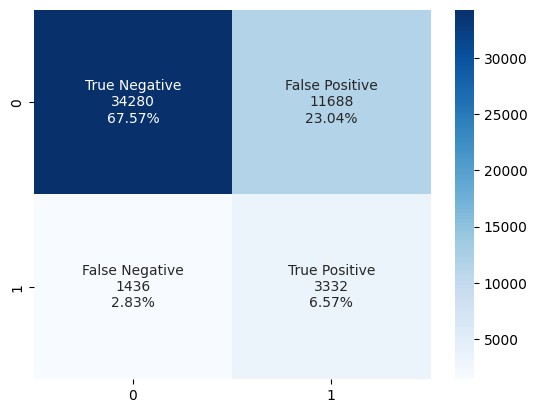

In [137]:
scaler.fit(X_ru)
X_train_std3 = scaler.transform(X_ru)

clf2.fit(X_train_std3, y_ru)

X_test_std3 = scaler.transform(X_test)

y_ru_pred_3 = clf2.predict(X_test_std3)

o5 = evaluate_model(clf2, X_ru, y_ru)
print(o5)
draw_confusion_matrix(y_test, y_ru_pred_3)

##### Tomeklinks

[codecarbon INFO @ 14:16:35] Energy consumed for RAM : 0.003068 kWh. RAM Power : 11.703141689300537 W
[codecarbon INFO @ 14:16:35] Energy consumed for all CPUs : 0.005912 kWh. Total CPU Power : 22.5 W
[codecarbon INFO @ 14:16:35] 0.008980 kWh of electricity used since the beginning.
[codecarbon INFO @ 14:16:50] Energy consumed for RAM : 0.003116 kWh. RAM Power : 11.703141689300537 W
[codecarbon INFO @ 14:16:50] Energy consumed for all CPUs : 0.006006 kWh. Total CPU Power : 22.5 W
[codecarbon INFO @ 14:16:50] 0.009122 kWh of electricity used since the beginning.
[codecarbon INFO @ 14:17:05] Energy consumed for RAM : 0.003165 kWh. RAM Power : 11.703141689300537 W
[codecarbon INFO @ 14:17:05] Energy consumed for all CPUs : 0.006100 kWh. Total CPU Power : 22.5 W
[codecarbon INFO @ 14:17:05] 0.009265 kWh of electricity used since the beginning.


Model: KNeighborsClassifier
Accuracy: 0.8965231788079471
Precision: 0.3653631284916201
Recall: 0.13716442953020133
F1 Score: 0.19945105215004574
AUC-ROC: 0.5562257929064164


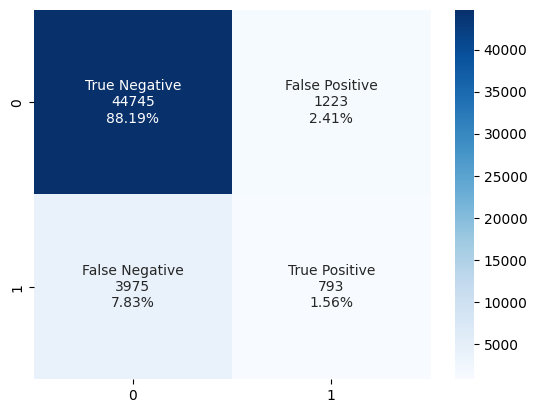

In [43]:
scaler.fit(X_T)
X_train_std_tl = scaler.transform(X_T)
clf2.fit(X_train_std_tl, y_T)
X_test_std_tl = scaler.transform(X_test)
y_tl_pred = clf2.predict(X_test_std_tl)
evaluate_model(clf2, X_T, y_T)
draw_confusion_matrix(y_test, y_tl_pred)

##### Undersampled and Oversampled - TomekLinks and SMOTE

[codecarbon INFO @ 16:18:49] Energy consumed for RAM : 0.026877 kWh. RAM Power : 11.703141689300537 W
[codecarbon INFO @ 16:18:49] Energy consumed for all CPUs : 0.051742 kWh. Total CPU Power : 22.5 W
[codecarbon INFO @ 16:18:49] 0.078619 kWh of electricity used since the beginning.
[codecarbon INFO @ 16:19:04] Energy consumed for RAM : 0.026928 kWh. RAM Power : 11.703141689300537 W
[codecarbon INFO @ 16:19:04] Energy consumed for all CPUs : 0.051839 kWh. Total CPU Power : 22.5 W
[codecarbon INFO @ 16:19:04] 0.078766 kWh of electricity used since the beginning.


{'Model': 'KNeighborsClassifier', 'Accuracy': 0.8178610848312835, 'Precision': 0.23808408478744583, 'Recall': 0.4263842281879195, 'F1 Score': 0.3055534680994965, 'AUC-ROC': 0.6424254938363892}


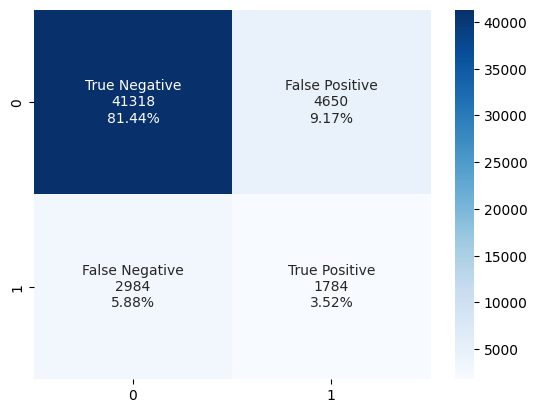

In [138]:
# Apply SMOTETomek oversampling and undersampling
scaler.fit(X_ST)
X_train_std_ST = scaler.transform(X_ST)
clf2.fit(X_train_std_ST, y_ST)
X_test_std_ST = scaler.transform(X_test)
y_ST_pred = clf2.predict(X_test_std_ST)
o6 = evaluate_model(clf2, X_ST, y_ST)
print(o6)
draw_confusion_matrix(y_test, y_ST_pred)

### Hyperparameter tuning

#### GridSearch with LinearSVC

In [ ]:
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}
gridSearch = GridSearchCV(LinearSVC(dual=False), param_grid, scoring='accuracy', cv=5)

[codecarbon INFO @ 18:54:25] Energy consumed for RAM : 0.057182 kWh. RAM Power : 11.703141689300537 W
[codecarbon INFO @ 18:54:25] Energy consumed for all CPUs : 0.110086 kWh. Total CPU Power : 22.5 W
[codecarbon INFO @ 18:54:25] 0.167268 kWh of electricity used since the beginning.
[codecarbon INFO @ 18:54:40] Energy consumed for RAM : 0.057230 kWh. RAM Power : 11.703141689300537 W
[codecarbon INFO @ 18:54:40] Energy consumed for all CPUs : 0.110180 kWh. Total CPU Power : 22.5 W
[codecarbon INFO @ 18:54:40] 0.167411 kWh of electricity used since the beginning.
[codecarbon INFO @ 18:54:55] Energy consumed for RAM : 0.057279 kWh. RAM Power : 11.703141689300537 W
[codecarbon INFO @ 18:54:55] Energy consumed for all CPUs : 0.110274 kWh. Total CPU Power : 22.5 W
[codecarbon INFO @ 18:54:55] 0.167553 kWh of electricity used since the beginning.
[codecarbon INFO @ 18:55:10] Energy consumed for RAM : 0.057328 kWh. RAM Power : 11.703141689300537 W
[codecarbon INFO @ 18:55:10] Energy consumed f

##### Oversampling

##### SMOTE

[codecarbon INFO @ 14:17:52] Energy consumed for RAM : 0.003316 kWh. RAM Power : 11.703141689300537 W
[codecarbon INFO @ 14:17:52] Energy consumed for all CPUs : 0.006391 kWh. Total CPU Power : 22.5 W
[codecarbon INFO @ 14:17:52] 0.009708 kWh of electricity used since the beginning.
[codecarbon INFO @ 14:18:07] Energy consumed for RAM : 0.003365 kWh. RAM Power : 11.703141689300537 W
[codecarbon INFO @ 14:18:07] Energy consumed for all CPUs : 0.006485 kWh. Total CPU Power : 22.5 W
[codecarbon INFO @ 14:18:07] 0.009850 kWh of electricity used since the beginning.
[codecarbon INFO @ 14:18:22] Energy consumed for RAM : 0.003414 kWh. RAM Power : 11.703141689300537 W
[codecarbon INFO @ 14:18:22] Energy consumed for all CPUs : 0.006579 kWh. Total CPU Power : 22.5 W
[codecarbon INFO @ 14:18:22] 0.009993 kWh of electricity used since the beginning.
[codecarbon INFO @ 14:18:37] Energy consumed for RAM : 0.003462 kWh. RAM Power : 11.703141689300537 W
[codecarbon INFO @ 14:18:37] Energy consumed f

Model: DecisionTreeClassifier
Accuracy: 0.7706559444970041
Precision: 0.23870035002282758
Recall: 0.6579278523489933
F1 Score: 0.3503070910106086
AUC-ROC: 0.7201382213363483


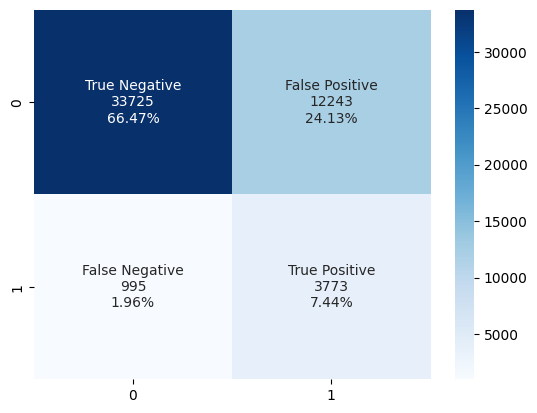

In [46]:
gridSearch.fit(X_S, y_S)
clf3 = LinearSVC(C=float(gridSearch.best_params_['C']), dual=False)
clf3.fit(X_S, y_S)
y_S_pred3 = clf3.predict(X_test)
evaluate_model(clf, X_S, y_S)
draw_confusion_matrix(y_test, y_S_pred3)

##### Random

[codecarbon INFO @ 16:19:19] Energy consumed for RAM : 0.026976 kWh. RAM Power : 11.703141689300537 W
[codecarbon INFO @ 16:19:19] Energy consumed for all CPUs : 0.051932 kWh. Total CPU Power : 22.5 W
[codecarbon INFO @ 16:19:19] 0.078909 kWh of electricity used since the beginning.
[codecarbon INFO @ 16:19:34] Energy consumed for RAM : 0.027025 kWh. RAM Power : 11.703141689300537 W
[codecarbon INFO @ 16:19:34] Energy consumed for all CPUs : 0.052026 kWh. Total CPU Power : 22.5 W
[codecarbon INFO @ 16:19:34] 0.079051 kWh of electricity used since the beginning.
[codecarbon INFO @ 16:19:49] Energy consumed for RAM : 0.027074 kWh. RAM Power : 11.703141689300537 W
[codecarbon INFO @ 16:19:49] Energy consumed for all CPUs : 0.052120 kWh. Total CPU Power : 22.5 W
[codecarbon INFO @ 16:19:49] 0.079194 kWh of electricity used since the beginning.


{'Model': 'LinearSVC', 'Accuracy': 0.739908546199937, 'Precision': 0.236789506558401, 'Recall': 0.7950922818791947, 'F1 Score': 0.36490518817980555, 'AUC-ROC': 0.764638466035316}


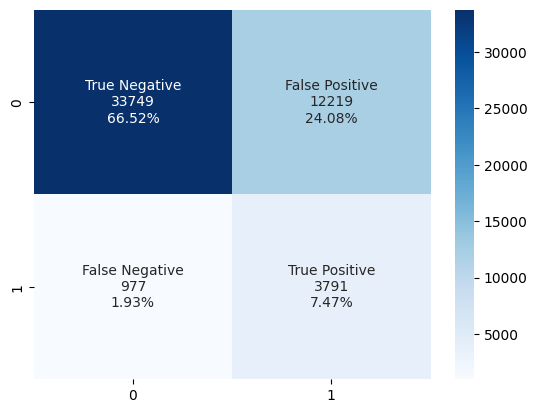

In [139]:
gridSearch.fit(X_ro, y_ro)
clf_ro = LinearSVC(C=float(gridSearch.best_params_['C']), dual=False)
clf_ro.fit(X_ro, y_ro)
y_ro_pred = clf_ro.predict(X_test)
o7 = evaluate_model(clf_ro, X_ro, y_ro)
print(o7)
draw_confusion_matrix(y_test, y_ro_pred)

##### Undersampling

##### Random

{'Model': 'LinearSVC', 'Accuracy': 0.7396917376222012, 'Precision': 0.23659404457207067, 'Recall': 0.7948825503355704, 'F1 Score': 0.3646509837879444, 'AUC-ROC': 0.7644248289443254}


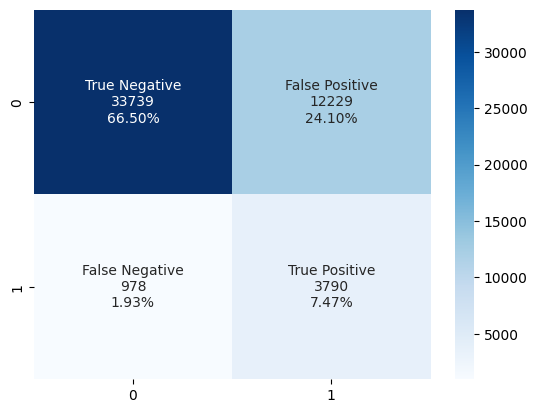

In [140]:
gridSearch.fit(X_ru, y_ru)
clf_ru = LinearSVC(C=float(gridSearch.best_params_['C']), dual=False)
clf_ru.fit(X_ru, y_ru)
y_ru_pred = clf_ru.predict(X_test)
o8 = evaluate_model(clf_ru, X_ru, y_ru)
print(o8)
draw_confusion_matrix(y_test, y_ru_pred)

##### Tomeklinks

[codecarbon INFO @ 14:19:52] Energy consumed for RAM : 0.003706 kWh. RAM Power : 11.703141689300537 W
[codecarbon INFO @ 14:19:52] Energy consumed for all CPUs : 0.007142 kWh. Total CPU Power : 22.5 W
[codecarbon INFO @ 14:19:52] 0.010848 kWh of electricity used since the beginning.


[codecarbon INFO @ 14:20:07] Energy consumed for RAM : 0.003755 kWh. RAM Power : 11.703141689300537 W
[codecarbon INFO @ 14:20:07] Energy consumed for all CPUs : 0.007236 kWh. Total CPU Power : 22.5 W
[codecarbon INFO @ 14:20:07] 0.010990 kWh of electricity used since the beginning.


Model: LinearSVC
Accuracy: 0.9076789656259855
Precision: 0.6129032258064516
Recall: 0.047818791946308725
F1 Score: 0.088715953307393
AUC-ROC: 0.5223430889769831


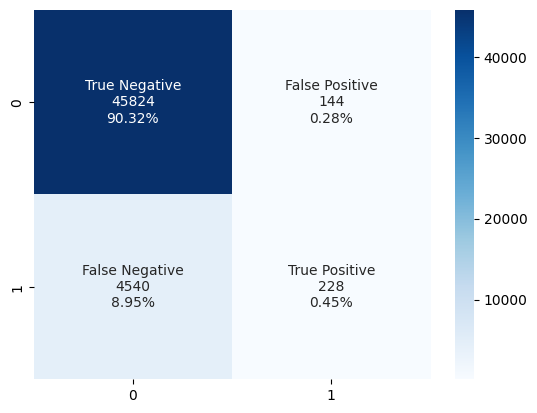

In [49]:
# For TomekLinks undersampling
gridSearch.fit(X_T, y_T)
clf_tl = LinearSVC(C=float(gridSearch.best_params_['C']), dual=False)
clf_tl.fit(X_T, y_T)
y_tl_pred = clf_tl.predict(X_test)
evaluate_model(clf_tl, X_T, y_T)
draw_confusion_matrix(y_test, y_tl_pred)

##### Oversampling and undersampling - SMOTE and Tomeklinks

[codecarbon INFO @ 16:20:04] Energy consumed for RAM : 0.027122 kWh. RAM Power : 11.703141689300537 W
[codecarbon INFO @ 16:20:04] Energy consumed for all CPUs : 0.052214 kWh. Total CPU Power : 22.5 W
[codecarbon INFO @ 16:20:04] 0.079336 kWh of electricity used since the beginning.
[codecarbon INFO @ 16:20:19] Energy consumed for RAM : 0.027171 kWh. RAM Power : 11.703141689300537 W
[codecarbon INFO @ 16:20:19] Energy consumed for all CPUs : 0.052308 kWh. Total CPU Power : 22.5 W
[codecarbon INFO @ 16:20:19] 0.079479 kWh of electricity used since the beginning.
[codecarbon INFO @ 16:20:34] Energy consumed for RAM : 0.027220 kWh. RAM Power : 11.703141689300537 W
[codecarbon INFO @ 16:20:34] Energy consumed for all CPUs : 0.052401 kWh. Total CPU Power : 22.5 W
[codecarbon INFO @ 16:20:34] 0.079621 kWh of electricity used since the beginning.
[codecarbon INFO @ 16:20:49] Energy consumed for RAM : 0.027269 kWh. RAM Power : 11.703141689300537 W
[codecarbon INFO @ 16:20:49] Energy consumed f

{'Model': 'LinearSVC', 'Accuracy': 0.7395537685272785, 'Precision': 0.2362932434120145, 'Recall': 0.7936241610738255, 'F1 Score': 0.36416129342700415, 'AUC-ROC': 0.7637847571815352}


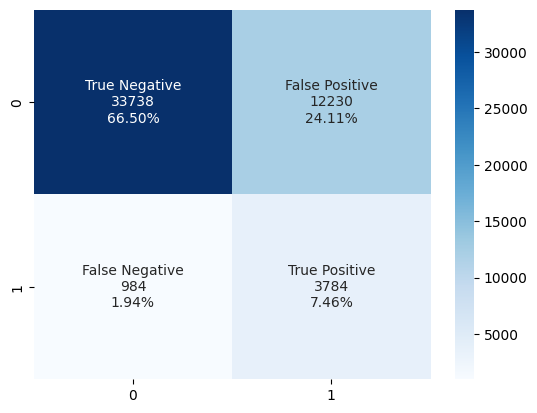

In [141]:
smote_tomek = SMOTETomek(random_state=42)
X_st, y_st = smote_tomek.fit_resample(X, y)
gridSearch.fit(X_st, y_st)
clf_st = LinearSVC(C=float(gridSearch.best_params_['C']), dual=False)
clf_st.fit(X_st, y_st)
y_st_pred = clf_st.predict(X_test)
o9 = evaluate_model(clf_st, X_st, y_st)
print(o9)
draw_confusion_matrix(y_test, y_st_pred)

### RandomSearch

In [51]:
param_distributions = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}
randomSearch = RandomizedSearchCV(LinearSVC(dual=False), param_distributions, random_state=0)

##### Oversampling

##### SMOTE

c:\Users\u4025041\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_search.py:318: UserWarning: The total space of parameters 6 is smaller than n_iter=10. Running 6 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


[codecarbon INFO @ 14:22:53] Energy consumed for RAM : 0.004294 kWh. RAM Power : 11.703141689300537 W
[codecarbon INFO @ 14:22:53] Energy consumed for all CPUs : 0.008275 kWh. Total CPU Power : 22.5 W
[codecarbon INFO @ 14:22:53] 0.012569 kWh of electricity used since the beginning.
[codecarbon INFO @ 14:23:08] Energy consumed for RAM : 0.004343 kWh. RAM Power : 11.703141689300537 W
[codecarbon INFO @ 14:23:08] Energy consumed for all CPUs : 0.008369 kWh. Total CPU Power : 22.5 W
[codecarbon INFO @ 14:23:08] 0.012712 kWh of electricity used since the beginning.
[codecarbon INFO @ 14:23:23] Energy consumed for RAM : 0.004392 kWh. RAM Power : 11.703141689300537 W
[codecarbon INFO @ 14:23:23] Energy consumed for all CPUs : 0.008463 kWh. Total CPU Power : 22.5 W
[codecarbon INFO @ 14:23:23] 0.012854 kWh of electricity used since the beginning.


Model: LinearSVC
Accuracy: 0.7390807316304006
Precision: 0.23557692307692307
Recall: 0.7913171140939598
F1 Score: 0.3630677444187837
AUC-ROC: 0.7624898309766701


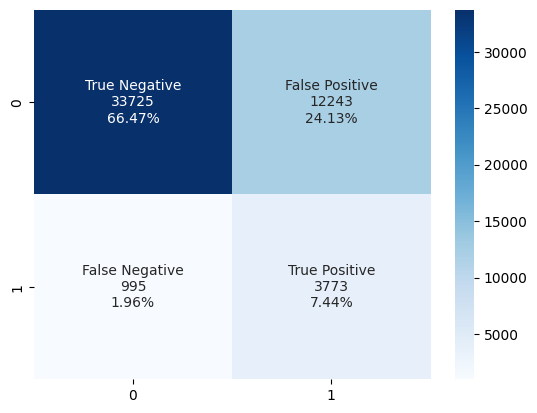

In [52]:
randomSearch.fit(X_S, y_S)
clf_S = LinearSVC(C=float(randomSearch.best_params_['C']), dual=False)
clf_S.fit(X_S, y_S)
y_S_pred = clf_S.predict(X_test)
evaluate_model(clf_S, X_S, y_S)
draw_confusion_matrix(y_test, y_S_pred)

##### Random

c:\Users\u4025041\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_search.py:318: UserWarning: The total space of parameters 6 is smaller than n_iter=10. Running 6 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
[codecarbon INFO @ 16:21:34] Energy consumed for RAM : 0.027415 kWh. RAM Power : 11.703141689300537 W
[codecarbon INFO @ 16:21:34] Energy consumed for all CPUs : 0.052777 kWh. Total CPU Power : 22.5 W
[codecarbon INFO @ 16:21:34] 0.080191 kWh of electricity used since the beginning.
[codecarbon INFO @ 16:21:49] Energy consumed for RAM : 0.027464 kWh. RAM Power : 11.703141689300537 W
[codecarbon INFO @ 16:21:49] Energy consumed for all CPUs : 0.052870 kWh. Total CPU Power : 22.5 W
[codecarbon INFO @ 16:21:49] 0.080334 kWh of electricity used since the beginning.


{'Model': 'LinearSVC', 'Accuracy': 0.739908546199937, 'Precision': 0.236789506558401, 'Recall': 0.7950922818791947, 'F1 Score': 0.36490518817980555, 'AUC-ROC': 0.764638466035316}


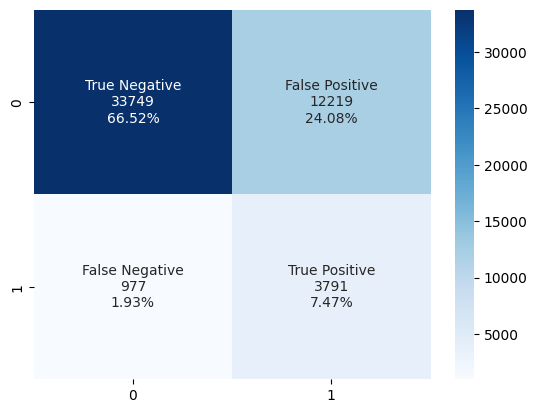

In [142]:
randomSearch.fit(X_ro, y_ro)
clf_ro = LinearSVC(C=float(randomSearch.best_params_['C']), dual=False)
clf_ro.fit(X_ro, y_ro)
y_ro_pred = clf_ro.predict(X_test)
o10 = evaluate_model(clf_ro, X_ro, y_ro)
print(o10)
draw_confusion_matrix(y_test, y_ro_pred)

##### Undersampling

##### Random

c:\Users\u4025041\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_search.py:318: UserWarning: The total space of parameters 6 is smaller than n_iter=10. Running 6 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


{'Model': 'LinearSVC', 'Accuracy': 0.7396917376222012, 'Precision': 0.23659404457207067, 'Recall': 0.7948825503355704, 'F1 Score': 0.3646509837879444, 'AUC-ROC': 0.7644248289443254}


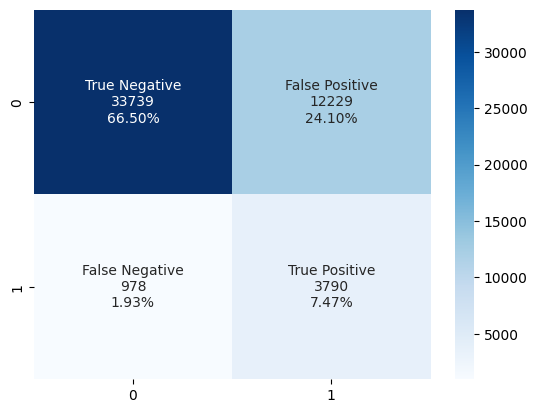

In [143]:
randomSearch.fit(X_ru, y_ru)
clf_ru = LinearSVC(C=float(randomSearch.best_params_['C']), dual=False)
clf_ru.fit(X_ru, y_ru)
y_ru_pred = clf_ru.predict(X_test)
o11 = evaluate_model(clf_ru, X_ru, y_ru)
print(o11)
draw_confusion_matrix(y_test, y_ru_pred)

##### Tomeklinks

c:\Users\u4025041\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_search.py:318: UserWarning: The total space of parameters 6 is smaller than n_iter=10. Running 6 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
[codecarbon INFO @ 14:24:38] Energy consumed for RAM : 0.004635 kWh. RAM Power : 11.703141689300537 W
[codecarbon INFO @ 14:24:38] Energy consumed for all CPUs : 0.008932 kWh. Total CPU Power : 22.5 W
[codecarbon INFO @ 14:24:38] 0.013567 kWh of electricity used since the beginning.
[codecarbon INFO @ 14:24:53] Energy consumed for RAM : 0.004684 kWh. RAM Power : 11.703141689300537 W
[codecarbon INFO @ 14:24:53] Energy consumed for all CPUs : 0.009026 kWh. Total CPU Power : 22.5 W
[codecarbon INFO @ 14:24:53] 0.013709 kWh of electricity used since the beginning.


Model: LinearSVC
Accuracy: 0.9076789656259855
Precision: 0.6129032258064516
Recall: 0.047818791946308725
F1 Score: 0.088715953307393
AUC-ROC: 0.5223430889769831


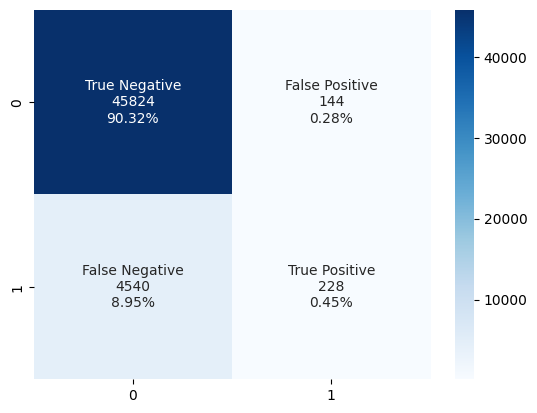

In [55]:
randomSearch.fit(X_T, y_T)
clf_tl = LinearSVC(C=float(randomSearch.best_params_['C']), dual=False)
clf_tl.fit(X_T, y_T)
y_tl_pred = clf_tl.predict(X_test)
evaluate_model(clf_tl, X_T, y_T)
draw_confusion_matrix(y_test, y_tl_pred)

##### Oversampling and Undersampling

c:\Users\u4025041\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_search.py:318: UserWarning: The total space of parameters 6 is smaller than n_iter=10. Running 6 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
[codecarbon INFO @ 16:22:04] Energy consumed for RAM : 0.027512 kWh. RAM Power : 11.703141689300537 W
[codecarbon INFO @ 16:22:04] Energy consumed for all CPUs : 0.052964 kWh. Total CPU Power : 22.5 W
[codecarbon INFO @ 16:22:04] 0.080476 kWh of electricity used since the beginning.
[codecarbon INFO @ 16:22:19] Energy consumed for RAM : 0.027561 kWh. RAM Power : 11.703141689300537 W
[codecarbon INFO @ 16:22:19] Energy consumed for all CPUs : 0.053058 kWh. Total CPU Power : 22.5 W
[codecarbon INFO @ 16:22:19] 0.080619 kWh of electricity used since the beginning.


{'Model': 'LinearSVC', 'Accuracy': 0.7395340586565752, 'Precision': 0.23604774701581152, 'Recall': 0.7921560402684564, 'F1 Score': 0.3637151523905821, 'AUC-ROC': 0.7631159595703578}


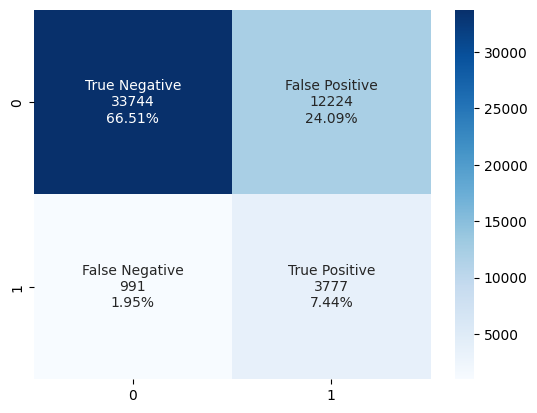

In [144]:
randomSearch.fit(X_ST, y_ST)
clf_ST = LinearSVC(C=float(randomSearch.best_params_['C']), dual=False)
clf_ST.fit(X_ST, y_ST)
y_ST_pred = clf_ST.predict(X_test)
o12 = evaluate_model(clf_ST, X_ST, y_ST)
print(o12)
draw_confusion_matrix(y_test, y_ST_pred)

### Ensemble methods

In [57]:
scaler = StandardScaler()
clf4 = RandomForestClassifier(n_estimators = 5, max_depth = 6)

#### Bagging - RandomForest

##### Oversampling

##### SMOTE

Model: RandomForestClassifier
Accuracy: 0.7660832544938505
Precision: 0.24464105884045462
Recall: 0.7132969798657718
F1 Score: 0.36432779860739156
AUC-ROC: 0.7424277276634811


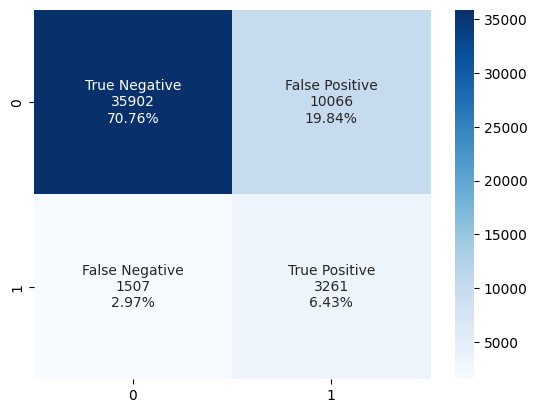

In [58]:
scaler.fit(X_S)
X_train_std = scaler.transform(X_S)
X_test_std = scaler.transform(X_test)
clf4.fit(X_S, y_S)
y_S_pred4 = clf4.predict(X_test)
evaluate_model(clf4, X_S, y_S)
draw_confusion_matrix(y_test, y_S_pred4)

##### Random

{'Model': 'RandomForestClassifier', 'Accuracy': 0.6997989593188269, 'Precision': 0.213734610123119, 'Recall': 0.8192114093959731, 'F1 Score': 0.3390183569847676, 'AUC-ROC': 0.7533121961703151}


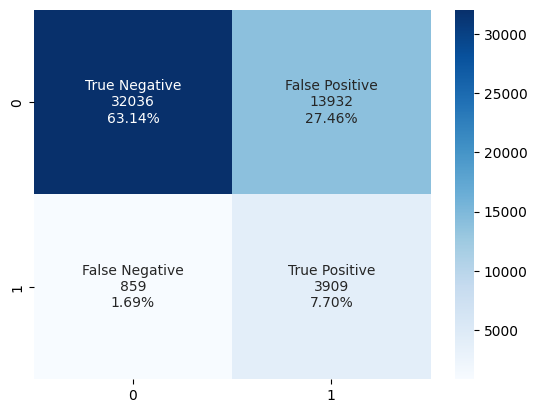

In [145]:
scaler.fit(X_ro)
X_train_std = scaler.transform(X_ro)
X_test_std = scaler.transform(X_test)
clf4.fit(X_ro, y_ro)
y_ro_pred4 = clf4.predict(X_test)
o13 = evaluate_model(clf4, X_ro, y_ro)
print(o13)
draw_confusion_matrix(y_test, y_ro_pred4)

##### Undersampling

##### Random

{'Model': 'RandomForestClassifier', 'Accuracy': 0.7151135288552507, 'Precision': 0.2212180520377619, 'Recall': 0.805998322147651, 'F1 Score': 0.34715447154471546, 'AUC-ROC': 0.755842443357153}


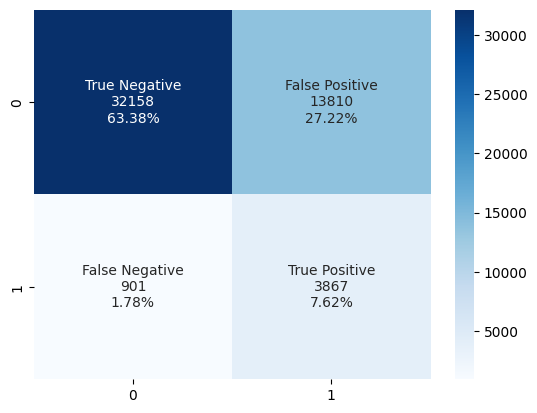

In [146]:
scaler.fit(X_ru)
X_train_std = scaler.transform(X_ru)
X_test_std = scaler.transform(X_test)
clf4.fit(X_ru, y_ru)
y_ru_pred4 = clf4.predict(X_test)
o14 = evaluate_model(clf4, X_ru, y_ru)
print(o14)
draw_confusion_matrix(y_test, y_ru_pred4)

##### TomekLinks

Model: RandomForestClassifier
Accuracy: 0.907481866918953
Precision: 0.5783898305084746
Recall: 0.05725671140939597
F1 Score: 0.10419847328244275
AUC-ROC: 0.5264638064530447


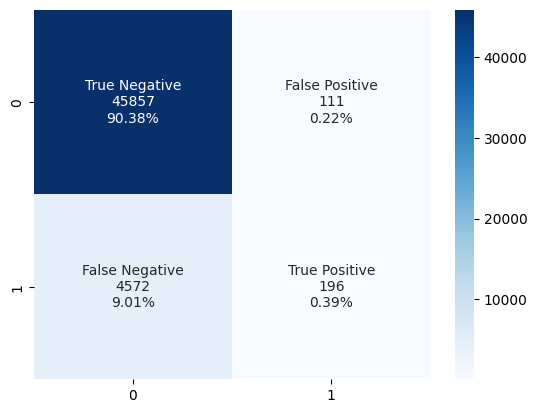

In [61]:
scaler.fit(X_T)
X_train_std = scaler.transform(X_T)
X_test_std = scaler.transform(X_test)
clf4.fit(X_T, y_T)
y_tl_pred4 = clf4.predict(X_test)
evaluate_model(clf4, X_T, y_T)
draw_confusion_matrix(y_test, y_tl_pred4)

##### Oversampling and undersampling

{'Model': 'RandomForestClassifier', 'Accuracy': 0.7816540523494165, 'Precision': 0.2540919719407638, 'Recall': 0.6837248322147651, 'F1 Score': 0.37049664734628934, 'AUC-ROC': 0.7377682636535016}


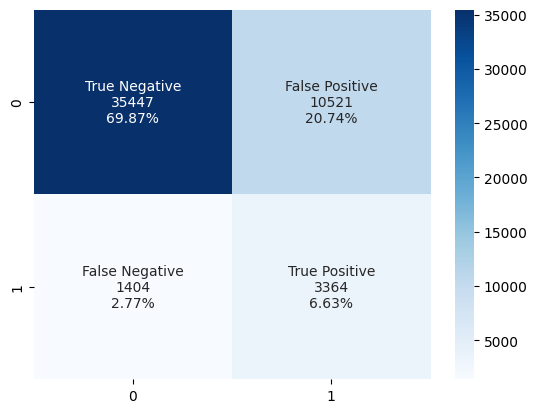

In [147]:
scaler.fit(X_st)
X_train_std = scaler.transform(X_st)
X_test_std = scaler.transform(X_test)
clf4.fit(X_st, y_st)
y_st_pred4 = clf4.predict(X_test)
o15 = evaluate_model(clf4, X_st, y_st)
print(o15)
draw_confusion_matrix(y_test, y_st_pred4)

#### Boosting

#### AdaBoost

In [63]:
clf5 = AdaBoostClassifier(DecisionTreeClassifier(max_depth = 2, random_state=55), n_estimators = 2)

##### Oversampled

##### SMOTE

c:\Users\u4025041\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\u4025041\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Model: AdaBoostClassifier
Accuracy: 0.699247082939136
Precision: 0.2015023046719399
Recall: 0.7426593959731543
F1 Score: 0.3169956582068842
AUC-ROC: 0.7187017829152232


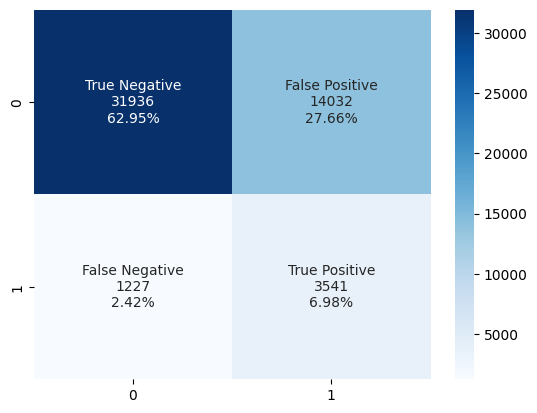

In [64]:
clf5.fit(X_S, y_S)
y_S_pred5 = clf5.predict(X_test)
evaluate_model(clf5, X_S, y_S)
draw_confusion_matrix(y_test, y_S_pred5)

##### Random - <span style="color:red">**(Maybe also BEST?)**</span>

c:\Users\u4025041\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\u4025041\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
[codecarbon INFO @ 16:22:34] Energy consumed for RAM : 0.027610 kWh. RAM Power : 11.703141689300537 W
[codecarbon INFO @ 16:22:34] Energy consumed for all CPUs : 0.053152 kWh. Total CPU Power : 22.5 W
[codecarbon INFO @ 16:22:34] 0.080762 kWh of electricity used since the beginning.


{'Model': 'AdaBoostClassifier', 'Accuracy': 0.6603792179123305, 'Precision': 0.1917997922745932, 'Recall': 0.8133389261744967, 'F1 Score': 0.3104014087325409, 'AUC-ROC': 0.728926250417565}


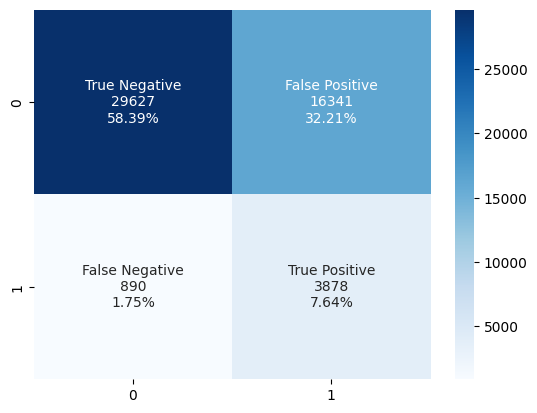

In [148]:
clf5.fit(X_ro, y_ro)
y_ro_pred5 = clf5.predict(X_test)
o16 = evaluate_model(clf5, X_ro, y_ro)
print(o16)
draw_confusion_matrix(y_test, y_ro_pred5)

##### Undersampled

##### Random

c:\Users\u4025041\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\u4025041\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


{'Model': 'AdaBoostClassifier', 'Accuracy': 0.6603792179123305, 'Precision': 0.1917997922745932, 'Recall': 0.8133389261744967, 'F1 Score': 0.3104014087325409, 'AUC-ROC': 0.728926250417565}


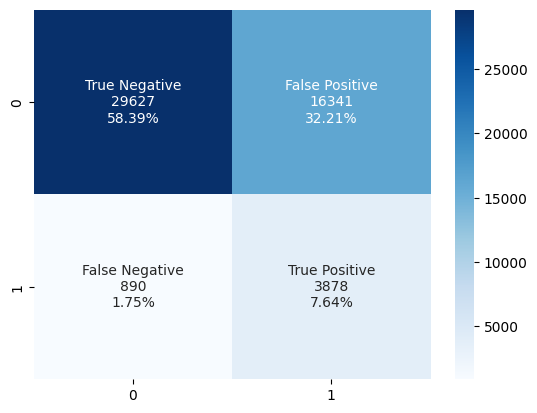

In [149]:
clf5.fit(X_ru, y_ru)
y_ru_pred5 = clf5.predict(X_test)
o17 = evaluate_model(clf5, X_ru, y_ru)
print(o17)
draw_confusion_matrix(y_test, y_ru_pred5)

##### TomekLinks

c:\Users\u4025041\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\u4025041\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Model: AdaBoostClassifier
Accuracy: 0.9073833175654368
Precision: 0.5577889447236181
Recall: 0.06984060402684564
F1 Score: 0.12413793103448276
AUC-ROC: 0.5320487391871088


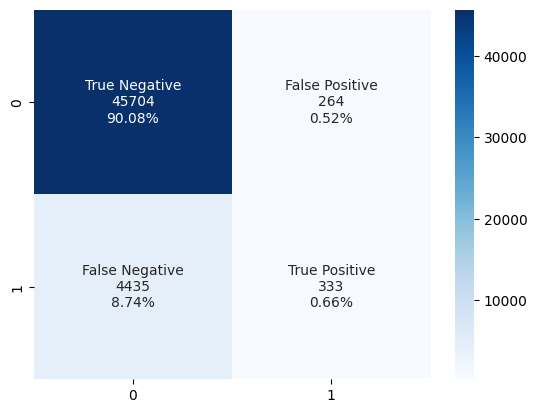

In [67]:
clf5.fit(X_T, y_T)
y_tl_pred5 = clf5.predict(X_test)
evaluate_model(clf5, X_T, y_T)
draw_confusion_matrix(y_test, y_tl_pred5)

##### Oversampled and undersampled

c:\Users\u4025041\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\u4025041\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


{'Model': 'AdaBoostClassifier', 'Accuracy': 0.699247082939136, 'Precision': 0.2015023046719399, 'Recall': 0.7426593959731543, 'F1 Score': 0.3169956582068842, 'AUC-ROC': 0.7187017829152232}


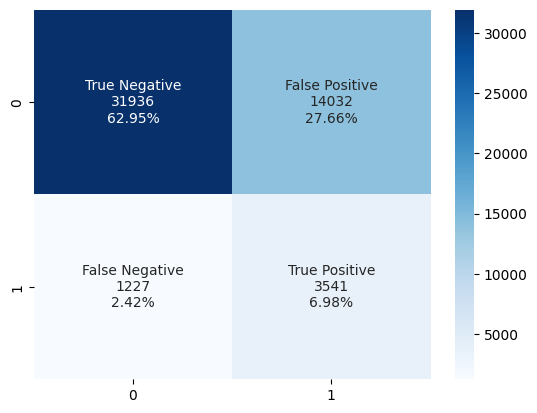

In [150]:
clf5.fit(X_st, y_st)
y_st_pred5 = clf5.predict(X_test)
o18 = evaluate_model(clf5, X_st, y_st)
print(o18)
draw_confusion_matrix(y_test, y_st_pred5)

#### XGBoost

In [69]:
clf6 = XGBClassifier(n_estimators=2, max_depth=2, learning_rate=1, objective='binary:logistic')

##### Oversampled

##### SMOTE

Model: XGBClassifier
Accuracy: 0.7446586250394197
Precision: 0.22395306494031963
Recall: 0.696518456375839
F1 Score: 0.33892942797366943
AUC-ROC: 0.7230851940772338


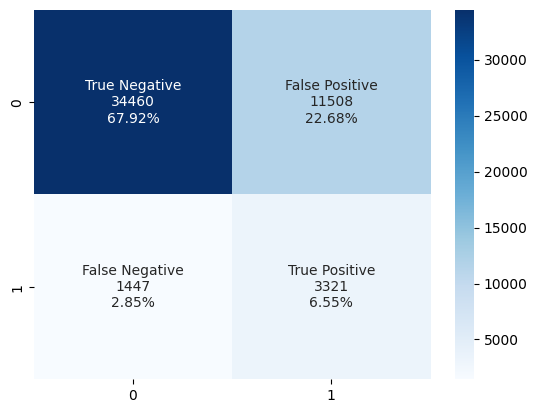

In [70]:
clf6.fit(X_S, y_S)
preds = clf6.predict(X_test)
evaluate_model(clf6, X_S, y_S)
draw_confusion_matrix(y_test, preds)

##### Random

{'Model': 'XGBClassifier', 'Accuracy': 0.6815081993062125, 'Precision': 0.20132151659761918, 'Recall': 0.8051593959731543, 'F1 Score': 0.32210429164743887, 'AUC-ROC': 0.7369209788776319}


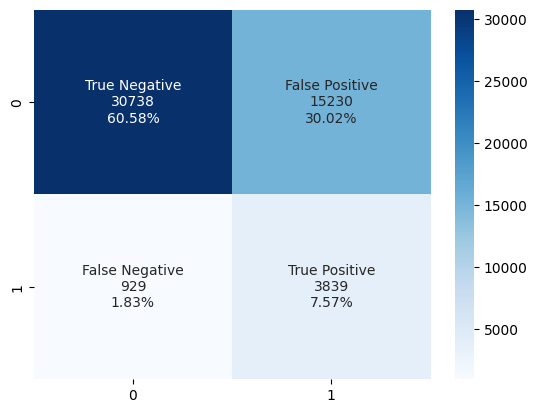

In [151]:
clf6.fit(X_ro, y_ro)
preds_ro = clf6.predict(X_test)
o19 = evaluate_model(clf6, X_ro, y_ro)
print(o19)
draw_confusion_matrix(y_test, preds_ro)

##### Undersampled

##### Random

{'Model': 'XGBClassifier', 'Accuracy': 0.6815081993062125, 'Precision': 0.20132151659761918, 'Recall': 0.8051593959731543, 'F1 Score': 0.32210429164743887, 'AUC-ROC': 0.7369209788776319}


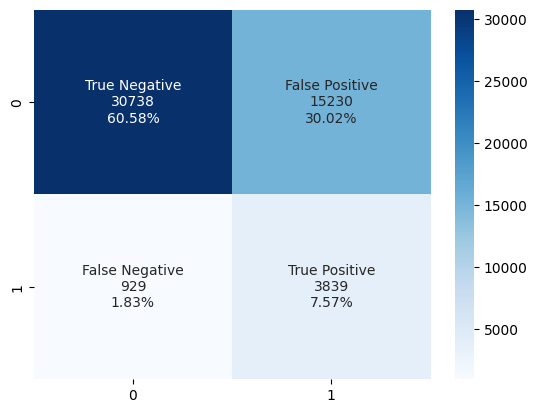

In [152]:
clf6.fit(X_ru, y_ru)
preds_ru = clf6.predict(X_test)
o20 = evaluate_model(clf6, X_ru, y_ru)
print(o20)
draw_confusion_matrix(y_test, preds_ru)

##### TomekLinks

Model: XGBClassifier
Accuracy: 0.9063584042888678
Precision: 0.5095398428731762
Recall: 0.09521812080536912
F1 Score: 0.16045237674500795
AUC-ROC: 0.5428557537545815


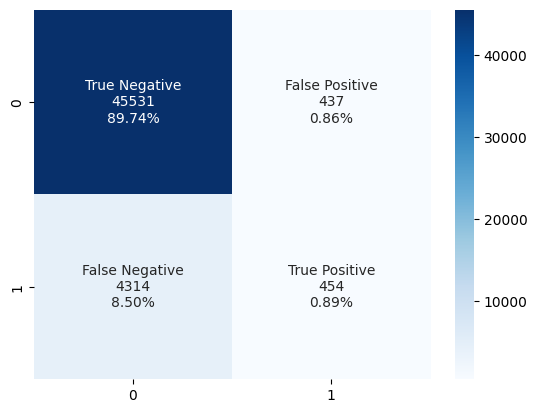

In [73]:
clf6.fit(X_T, y_T)
preds_tl = clf6.predict(X_test)
evaluate_model(clf6, X_T, y_T)
draw_confusion_matrix(y_test, preds_tl)

##### Oversampling and undersampling

{'Model': 'XGBClassifier', 'Accuracy': 0.7085304320403658, 'Precision': 0.20456421747847622, 'Recall': 0.7275587248322147, 'F1 Score': 0.3193408818926632, 'AUC-ROC': 0.7170577299761492}


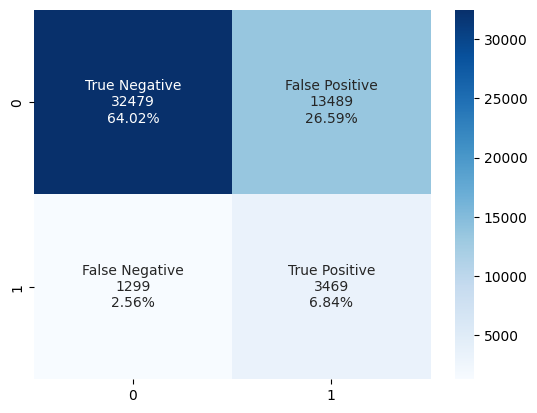

In [153]:
clf6.fit(X_st, y_st)
preds_st = clf6.predict(X_test)
o21 = evaluate_model(clf6, X_st, y_st)
print(o21)
draw_confusion_matrix(y_test, preds_st)

#### Voting

In [75]:
model_LR = LogisticRegression(solver='liblinear')
model_KNN = KNeighborsClassifier()
model_DT = DecisionTreeClassifier()

clf7 = VotingClassifier(estimators= [("model_LR",model_LR),("model_KNN", model_KNN),("model_DT", model_DT)], voting = 'hard')

tracker = EmissionsTracker()

[codecarbon WARNING @ 14:26:06] Invalid gpu_ids format. Expected a string or a list of ints.
[codecarbon INFO @ 14:26:06] [setup] RAM Tracking...
[codecarbon INFO @ 14:26:06] [setup] GPU Tracking...
[codecarbon INFO @ 14:26:06] No GPU found.


[codecarbon INFO @ 14:26:06] [setup] CPU Tracking...
[codecarbon WARNING @ 14:26:06] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon INFO @ 14:26:08] CPU Model on constant consumption mode: 11th Gen Intel(R) Core(TM) i7-11850H @ 2.50GHz
[codecarbon INFO @ 14:26:08] >>> Tracker's metadata:
[codecarbon INFO @ 14:26:08]   Platform system: Windows-10-10.0.19045-SP0
[codecarbon INFO @ 14:26:08]   Python version: 3.11.5
[codecarbon INFO @ 14:26:08]   CodeCarbon version: 2.4.1
[codecarbon INFO @ 14:26:08]   Available RAM : 31.208 GB
[codecarbon INFO @ 14:26:08]   CPU count: 16
[codecarbon INFO @ 14:26:08]   CPU model: 11th Gen Intel(R) Core(TM) i7-11850H @ 2.50GHz
[codecarbon INFO @ 14:26:08]   GPU count: None
[codecarbon INFO @ 14:26:08]   GPU model: None


##### Oversampled

##### SMOTE

[codecarbon INFO @ 16:22:49] Energy consumed for RAM : 0.027658 kWh. RAM Power : 11.703141689300537 W
[codecarbon INFO @ 16:22:49] Energy consumed for all CPUs : 0.053246 kWh. Total CPU Power : 22.5 W
[codecarbon INFO @ 16:22:49] 0.080904 kWh of electricity used since the beginning.
[codecarbon INFO @ 16:23:04] Energy consumed for RAM : 0.027707 kWh. RAM Power : 11.703141689300537 W
[codecarbon INFO @ 16:23:04] Energy consumed for all CPUs : 0.053339 kWh. Total CPU Power : 22.5 W
[codecarbon INFO @ 16:23:04] 0.081047 kWh of electricity used since the beginning.


{'Model': 'VotingClassifier', 'Accuracy': 0.8248777988016399, 'Precision': 0.2718102205963862, 'Recall': 0.514261744966443, 'F1 Score': 0.3556458046268765, 'AUC-ROC': 0.6856789929148261}


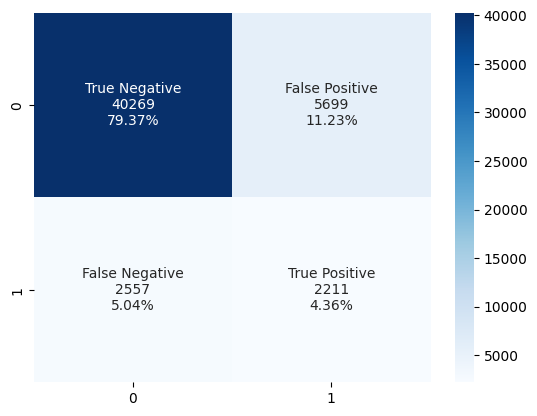

In [154]:
scaler.fit(X_S)
X_train_std = scaler.transform(X_S)
X_test_std = scaler.transform(X_test)
clf7.fit(X_train_std, y_S)
y_pred_VC = clf7.predict(X_test_std)
o22 = evaluate_model(clf7, X_S, y_S)
print(o22)
draw_confusion_matrix(y_test, y_pred_VC)

##### Random

[codecarbon INFO @ 16:23:19] Energy consumed for RAM : 0.027756 kWh. RAM Power : 11.703141689300537 W
[codecarbon INFO @ 16:23:19] Energy consumed for all CPUs : 0.053433 kWh. Total CPU Power : 22.5 W
[codecarbon INFO @ 16:23:19] 0.081189 kWh of electricity used since the beginning.
[codecarbon INFO @ 16:23:34] Energy consumed for RAM : 0.027805 kWh. RAM Power : 11.703141689300537 W
[codecarbon INFO @ 16:23:34] Energy consumed for all CPUs : 0.053527 kWh. Total CPU Power : 22.5 W
[codecarbon INFO @ 16:23:34] 0.081332 kWh of electricity used since the beginning.


{'Model': 'VotingClassifier', 'Accuracy': 0.8246609902239042, 'Precision': 0.26492027334851936, 'Recall': 0.48783557046979864, 'F1 Score': 0.34337171538234423, 'AUC-ROC': 0.6737167758370572}


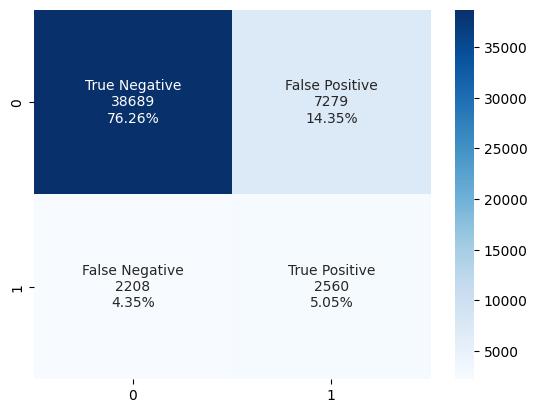

In [155]:
scaler.fit(X_ro)
X_train_std = scaler.transform(X_ro)
X_test_std = scaler.transform(X_test)
clf7.fit(X_train_std, y_ro)
y_pred_VC_ro = clf7.predict(X_test_std)
o23 = evaluate_model(clf7, X_ro, y_ro)
print(o23)
draw_confusion_matrix(y_test, y_pred_VC_ro)

##### Undersampled

##### Random

[codecarbon INFO @ 14:29:11] Energy consumed for RAM : 0.005518 kWh. RAM Power : 11.703141689300537 W
[codecarbon INFO @ 14:29:11] Energy consumed for all CPUs : 0.010635 kWh. Total CPU Power : 22.5 W
[codecarbon INFO @ 14:29:11] 0.016153 kWh of electricity used since the beginning.


Model: VotingClassifier
Accuracy: 0.7610178177231157
Precision: 0.238724341217416
Recall: 0.7049077181208053
F1 Score: 0.3566615376452486
AUC-ROC: 0.7358727591648232


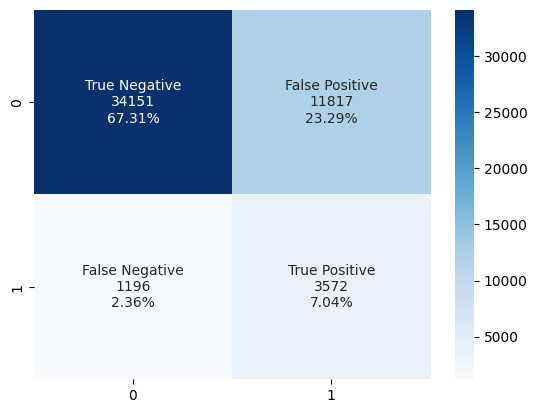

In [78]:
scaler.fit(X_ru)
X_train_std = scaler.transform(X_ru)
X_test_std = scaler.transform(X_test)
clf7.fit(X_train_std, y_ru)
y_pred_VC_ru = clf7.predict(X_test_std)
evaluate_model(clf7, X_ru, y_ru)
draw_confusion_matrix(y_test, y_pred_VC_ru)

##### TomekLinks

[codecarbon INFO @ 14:29:26] Energy consumed for RAM : 0.005567 kWh. RAM Power : 11.703141689300537 W
[codecarbon INFO @ 14:29:26] Energy consumed for all CPUs : 0.010729 kWh. Total CPU Power : 22.5 W
[codecarbon INFO @ 14:29:26] 0.016296 kWh of electricity used since the beginning.
[codecarbon INFO @ 14:29:41] Energy consumed for RAM : 0.005615 kWh. RAM Power : 11.703141689300537 W
[codecarbon INFO @ 14:29:41] Energy consumed for all CPUs : 0.010823 kWh. Total CPU Power : 22.5 W
[codecarbon INFO @ 14:29:41] 0.016438 kWh of electricity used since the beginning.


Model: VotingClassifier
Accuracy: 0.9029288867865026
Precision: 0.44198078344419806
Recall: 0.12541946308724833
F1 Score: 0.19539290965528508
AUC-ROC: 0.5544974969456429


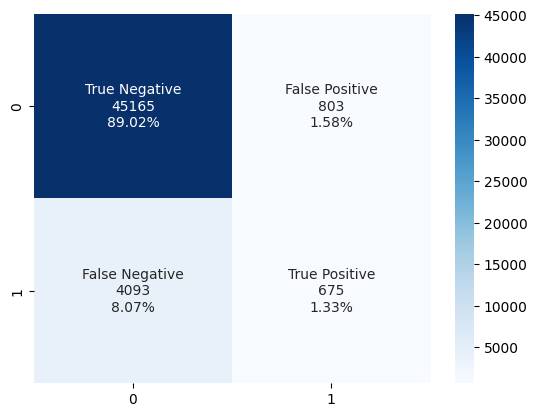

In [79]:
scaler.fit(X_T)
X_train_std = scaler.transform(X_T)
X_test_std = scaler.transform(X_test)
clf7.fit(X_train_std, y_T)
y_pred_VC_tl = clf7.predict(X_test_std)
evaluate_model(clf7, X_T, y_T)
draw_confusion_matrix(y_test, y_pred_VC_tl)

##### Oversampling and undersampling - <span style="color:red">**(I THINK THIS IS THE BEST ONE?)**</span>

[codecarbon WARNING @ 17:22:08] Already started tracking
[codecarbon INFO @ 17:22:21] Energy consumed for RAM : 0.039254 kWh. RAM Power : 11.703141689300537 W
[codecarbon INFO @ 17:22:21] Energy consumed for all CPUs : 0.075569 kWh. Total CPU Power : 22.5 W
[codecarbon INFO @ 17:22:21] 0.114823 kWh of electricity used since the beginning.
[codecarbon WARNING @ 17:22:29] Tracker already stopped !
[codecarbon WARNING @ 17:22:29] Background scheduler didn't run for a long period (3512s), results might be inaccurate
[codecarbon INFO @ 17:22:29] Energy consumed for RAM : 0.033678 kWh. RAM Power : 11.703141689300537 W
[codecarbon INFO @ 17:22:29] Energy consumed for all CPUs : 0.064749 kWh. Total CPU Power : 22.5 W
[codecarbon INFO @ 17:22:29] 0.098427 kWh of electricity used since the beginning.


[codecarbon INFO @ 17:22:36] Energy consumed for RAM : 0.039302 kWh. RAM Power : 11.703141689300537 W
[codecarbon INFO @ 17:22:36] Energy consumed for all CPUs : 0.075663 kWh. Total CPU Power : 22.5 W
[codecarbon INFO @ 17:22:36] 0.114965 kWh of electricity used since the beginning.


{'Model': 'VotingClassifier', 'Accuracy': 0.884125670135604, 'Precision': 0.43511272047657984, 'Recall': 0.78125, 'F1 Score': 0.5589316527871558, 'AUC': 0.8380231900452488}


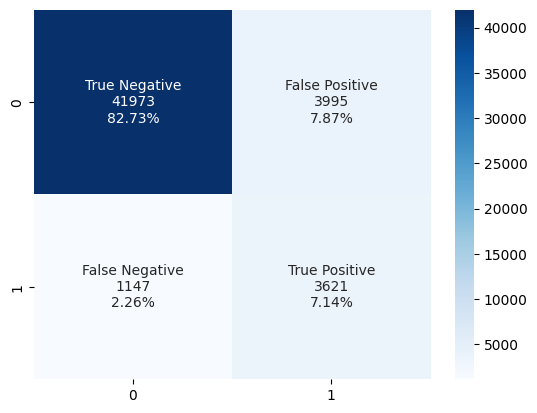

[codecarbon INFO @ 17:22:51] Energy consumed for RAM : 0.039351 kWh. RAM Power : 11.703141689300537 W
[codecarbon INFO @ 17:22:51] Energy consumed for all CPUs : 0.075757 kWh. Total CPU Power : 22.5 W
[codecarbon INFO @ 17:22:51] 0.115108 kWh of electricity used since the beginning.
[codecarbon INFO @ 17:23:06] Energy consumed for RAM : 0.039400 kWh. RAM Power : 11.703141689300537 W
[codecarbon INFO @ 17:23:06] Energy consumed for all CPUs : 0.075850 kWh. Total CPU Power : 22.5 W
[codecarbon INFO @ 17:23:06] 0.115250 kWh of electricity used since the beginning.
[codecarbon INFO @ 17:23:21] Energy consumed for RAM : 0.039449 kWh. RAM Power : 11.703141689300537 W
[codecarbon INFO @ 17:23:21] Energy consumed for all CPUs : 0.075944 kWh. Total CPU Power : 22.5 W
[codecarbon INFO @ 17:23:21] 0.115393 kWh of electricity used since the beginning.
[codecarbon INFO @ 17:23:36] Energy consumed for RAM : 0.039497 kWh. RAM Power : 11.703141689300537 W
[codecarbon INFO @ 17:23:36] Energy consumed f

In [ ]:
tracker.start()

scaler.fit(X_st)
X_train_std = scaler.transform(X_st)
X_test_std = scaler.transform(X_test)
clf7.fit(X_train_std, y_st)
y_pred_VC_st = clf7.predict(X_test_std)

tracker.stop()

print()

o24 = evaluate_model(clf7, X_st, y_st)
print(o24)
draw_confusion_matrix(y_test, y_pred_VC_st)

In [ ]:
actual_models = [o1, o2, o3, o4, o5, o6, o7, o8, o9, o10, o11, o12, o13, o14, o15, o16, o17, o18, o19, o20, o21, o22, o23, o24]
model_names = ['Ran Over', 'Ran Under', 'SMOTETEK', 'SMO Over', 'Ran Under', 'SMOTETEK', 'Ran Over', 'Ran Under', 'SMOTETEK', 'Ran Over', 'Ran Under', 'SMOTETEK', 'Ran Over', 'Ran Under', 'SMOTETEK', 'Ran Over', 'Ran Under', 'SMOTETEK', 'Ran Over', 'Ran Under', 'SMOTETEK', 'SMO Over', 'Ran Under', 'SMOTETEK']

df_overview = pd.DataFrame(actual_models, index=model_names)

df_overview = df_overview.drop(columns=['AUC'])

df_overview['AUC-ROC'] = df_overview['AUC-ROC'].fillna(0.838023)

df_overview

[]


[codecarbon INFO @ 18:46:24] Energy consumed for RAM : 0.055623 kWh. RAM Power : 11.703141689300537 W
[codecarbon INFO @ 18:46:24] Energy consumed for all CPUs : 0.107085 kWh. Total CPU Power : 22.5 W
[codecarbon INFO @ 18:46:24] 0.162708 kWh of electricity used since the beginning.
[codecarbon INFO @ 18:46:39] Energy consumed for RAM : 0.055671 kWh. RAM Power : 11.703141689300537 W
[codecarbon INFO @ 18:46:39] Energy consumed for all CPUs : 0.107179 kWh. Total CPU Power : 22.5 W
[codecarbon INFO @ 18:46:39] 0.162850 kWh of electricity used since the beginning.
[codecarbon INFO @ 18:46:54] Energy consumed for RAM : 0.055720 kWh. RAM Power : 11.703141689300537 W
[codecarbon INFO @ 18:46:55] Energy consumed for all CPUs : 0.107273 kWh. Total CPU Power : 22.5 W
[codecarbon INFO @ 18:46:55] 0.162993 kWh of electricity used since the beginning.
[codecarbon INFO @ 18:47:10] Energy consumed for RAM : 0.055769 kWh. RAM Power : 11.703141689300537 W
[codecarbon INFO @ 18:47:10] Energy consumed f

## Emission tracker

In [ ]:
pd.set_option('display.max_columns', None)
csv = pd.read_csv("emissions.csv")
csv

,timestamp,project_name,run_id,duration,emissions,emissions_rate,cpu_power,gpu_power,ram_power,cpu_energy,gpu_energy,ram_energy,energy_consumed,country_name,country_iso_code,region,cloud_provider,cloud_region,os,python_version,codecarbon_version,cpu_count,cpu_model,gpu_count,gpu_model,longitude,latitude,ram_total_size,tracking_mode,on_cloud,pue
0,2024-05-11T15:38:07,codecarbon,d9b71025-a308-4318-91af-b5198a931d39,37.638627,0.000064,0.000002,22.5,0.0,11.703142,0.000235,0,0.000122,0.000357,Denmark,DNK,NaN,NaN,NaN,Windows-10-10.0.19045-SP0,3.11.5,2.4.1,16,11th Gen Intel(R) Core(TM) i7-11850H @ 2.50GHz,NaN,NaN,12.0564,55.7123,31.208378,machine,N,1.0
1,2024-05-11T15:44:48,codecarbon,d9b71025-a308-4318-91af-b5198a931d39,439.422819,0.000753,0.000002,22.5,0.0,11.703142,0.002746,0,0.001428,0.004174,Denmark,DNK,NaN,NaN,NaN,Windows-10-10.0.19045-SP0,3.11.5,2.4.1,16,11th Gen Intel(R) Core(TM) i7-11850H @ 2.50GHz,NaN,NaN,12.0564,55.7123,31.208378,machine,N,1.0
2,2024-05-11T18:12:14,codecarbon,d9b71025-a308-4318-91af-b5198a931d39,9284.979237,0.015916,0.000002,22.5,0.0,11.703142,0.058031,0,0.030184,0.088215,Denmark,DNK,NaN,NaN,NaN,Windows-10-10.0.19045-SP0,3.11.5,2.4.1,16,11th Gen Intel(R) Core(TM) i7-11850H @ 2.50GHz,NaN,NaN,12.0564,55.7123,31.208378,machine,N,1.0
3,2024-05-13T14:30:21,codecarbon,f0fde75c-ec9d-43ef-bdc3-f0fafca63053,32.066976,0.000055,0.000002,22.5,0.0,11.703142,0.000200,0,0.000104,0.000304,Denmark,DNK,NaN,NaN,NaN,Windows-10-10.0.19045-SP0,3.11.5,2.4.1,16,11th Gen Intel(R) Core(TM) i7-11850H @ 2.50GHz,NaN,NaN,12.0564,55.7123,31.208378,machine,N,1.0
4,2024-05-13T15:16:40,codecarbon,f0fde75c-ec9d-43ef-bdc3-f0fafca63053,2810.828209,0.004818,0.000002,22.5,0.0,11.703142,0.017568,0,0.009137,0.026705,Denmark,DNK,NaN,NaN,NaN,Windows-10-10.0.19045-SP0,3.11.5,2.4.1,16,11th Gen Intel(R) Core(TM) i7-11850H @ 2.50GHz,NaN,NaN,12.0564,55.7123,31.208378,machine,N,1.0
5,2024-05-13T16:23:56,codecarbon,f0fde75c-ec9d-43ef-bdc3-f0fafca63053,6847.188622,0.011737,0.000002,22.5,0.0,11.703142,0.042795,0,0.022259,0.065054,Denmark,DNK,NaN,NaN,NaN,Windows-10-10.0.19045-SP0,3.11.5,2.4.1,16,11th Gen Intel(R) Core(TM) i7-11850H @ 2.50GHz,NaN,NaN,12.0564,55.7123,31.208378,machine,N,1.0
6,2024-05-13T17:22:29,codecarbon,f0fde75c-ec9d-43ef-bdc3-f0fafca63053,10359.850619,0.017758,0.000002,22.5,0.0,11.703142,0.064749,0,0.033678,0.098427,Denmark,DNK,NaN,NaN,NaN,Windows-10-10.0.19045-SP0,3.11.5,2.4.1,16,11th Gen Intel(R) Core(TM) i7-11850H @ 2.50GHz,NaN,NaN,12.0564,55.7123,31.208378,machine,N,1.0


[codecarbon INFO @ 17:55:38] Energy consumed for RAM : 0.045732 kWh. RAM Power : 11.703141689300537 W
[codecarbon INFO @ 17:55:38] Energy consumed for all CPUs : 0.088044 kWh. Total CPU Power : 22.5 W
[codecarbon INFO @ 17:55:38] 0.133776 kWh of electricity used since the beginning.
[codecarbon INFO @ 17:55:53] Energy consumed for RAM : 0.045781 kWh. RAM Power : 11.703141689300537 W
[codecarbon INFO @ 17:55:53] Energy consumed for all CPUs : 0.088137 kWh. Total CPU Power : 22.5 W
[codecarbon INFO @ 17:55:53] 0.133919 kWh of electricity used since the beginning.
[codecarbon INFO @ 17:56:08] Energy consumed for RAM : 0.045830 kWh. RAM Power : 11.703141689300537 W
[codecarbon INFO @ 17:56:08] Energy consumed for all CPUs : 0.088231 kWh. Total CPU Power : 22.5 W
[codecarbon INFO @ 17:56:08] 0.134061 kWh of electricity used since the beginning.
[codecarbon INFO @ 17:56:23] Energy consumed for RAM : 0.045879 kWh. RAM Power : 11.703141689300537 W
[codecarbon INFO @ 17:56:23] Energy consumed f